In [200]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [201]:
#Imported all libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn_extra.cluster import KMedoids

In [202]:
#Reading data from csv file into a data frame
df_given_data=pd.read_csv('/content/Country-data.csv')

In [203]:
#Checking if any NAN values present in given data 
print("No of NAN values in given data")
df_given_data.isna().sum().sum()

No of NAN values in given data


0

In [204]:
#Checking if any NAN values present in given data 
print("No of NULL values in given data")
df_given_data.isnull().sum().sum()

No of NULL values in given data


0

In [205]:
#Checking any country name repeated in country colomn
print("Printing no of unique names in country coloumn and no of rows in data frame")
print("If the both the counts are same then there no duplicates name of any country present in given data")
print(df_given_data.country.nunique())
print(len(df_given_data.index))


Printing no of unique names in country coloumn and no of rows in data frame
If the both the counts are same then there no duplicates name of any country present in given data
167
167


In [206]:
#Droping country column to apply sclaing on data
df_given_data_without_country=df_given_data.drop(['country'],axis=1)

In [207]:
#Scaling the given data
scaler = MinMaxScaler()
scaled_df=scaler.fit_transform(df_given_data_without_country)
scaled_df=pd.DataFrame(scaled_df,columns=df_given_data_without_country.columns)

In [208]:
#converting the 9 dimentional data to 2 dimensinal data using pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_df)
df_after_pca = pd.DataFrame(data = principalComponents , columns = ['x', 'y'])


In [209]:
#KMEANS CLUSTERING
#Assume k value
print("Assume k value 3")
kmeans_on_pca_data= KMeans(n_clusters = 3,random_state = 111)
kmeans_on_pca_data.fit(df_after_pca)
#print the number of points in every cluster
print("Printing the no of values in each cluster using KMeans ")
print(pd.Series(kmeans_on_pca_data.labels_).value_counts())

#KMEDOIDS CLUSTERING
kmedoids_on_pca_data= KMedoids(n_clusters = 3,random_state = 111)
kmedoids_on_pca_data.fit(df_after_pca)
#print the number of points in every cluster
print("Printing the no of values in each cluster using KMedoids ")
print(pd.Series(kmedoids_on_pca_data.labels_).value_counts())


Assume k value 3
Printing the no of values in each cluster using KMeans 
2    83
1    46
0    38
dtype: int64
Printing the no of values in each cluster using KMedoids 
1    64
0    58
2    45
dtype: int64


In [210]:
#predicting cluster number for each country using kmeans

preds = kmeans_on_pca_data.labels_
pca_with_clusters=pd.DataFrame(df_after_pca)
data_with_clusters = pd.DataFrame(df_given_data)
pca_with_clusters['KMeans_Clusters'] = preds
data_with_clusters['KMeans_Clusters']=preds

#predicting cluster number for each country us kmedoids

preds = kmedoids_on_pca_data.labels_
data_with_clusters['KMedoids_Clusters'] = preds
pca_with_clusters['KMedoids_Clusters']=preds

Visualisation of KMeans clusters


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


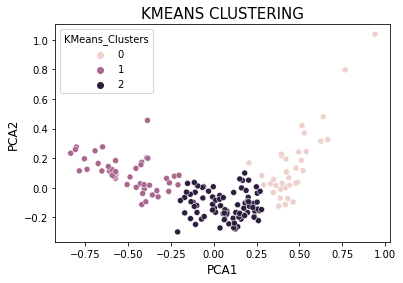

In [211]:
#Visualisation of KMeans clusters
print('Visualisation of KMeans clusters')
sns.scatterplot(pca_with_clusters['x'],pca_with_clusters['y'],hue='KMeans_Clusters',data=pca_with_clusters) 
plt.title("KMEANS CLUSTERING", fontsize=15)
plt.xlabel("PCA1", fontsize=12)
plt.ylabel("PCA2", fontsize=12)
plt.show()

Visualisation of KMedoids clusters


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


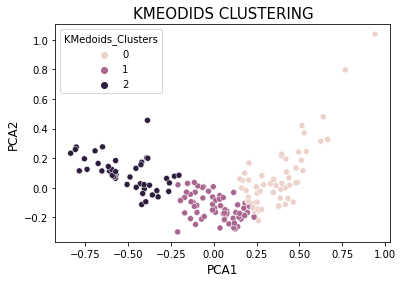

In [212]:
#Visualisation of KMedoids clusters
print('Visualisation of KMedoids clusters')
sns.scatterplot(pca_with_clusters['x'],pca_with_clusters['y'],hue='KMedoids_Clusters',data=pca_with_clusters) 
plt.title("KMEODIDS CLUSTERING", fontsize=15)
plt.xlabel("PCA1", fontsize=12)
plt.ylabel("PCA2", fontsize=12)
plt.show()

In [213]:
#calculating Silhouette Coefficient of model for k=3
print("Printing shilhouette score using KMeans")
print(metrics.silhouette_score(df_after_pca, kmeans_on_pca_data.labels_))

#calculating Silhouette Coefficient of model for k=3
print("Printing shilhouette score using KMedoids")
print(metrics.silhouette_score(df_after_pca, kmedoids_on_pca_data.labels_))

Printing shilhouette score using KMeans
0.7794811747288485
Printing shilhouette score using KMedoids
0.6628757821417425


In [214]:
print("Printing list of under_developing countries using KMeans\n")
print(list(data_with_clusters[data_with_clusters['KMeans_Clusters']==1]['country']))
print("\nPrinting list of developed countries using KMeans\n")
print(list(data_with_clusters[data_with_clusters['KMeans_Clusters']==0]['country']))
print("\nPrinting list of developing countries using KMeans")
print(list(data_with_clusters[data_with_clusters['KMeans_Clusters']==2]['country']))


print("\nPrinting list of under_developing countries using KMedoids\n")
print(list(data_with_clusters[data_with_clusters['KMeans_Clusters']==1]['country']))
print("\nPrinting list of developed countries using KMedoids\n")
print(list(data_with_clusters[data_with_clusters['KMeans_Clusters']==0]['country']))
print("\nPrinting list of developing countries using KMedoids\n")
print(list(data_with_clusters[data_with_clusters['KMeans_Clusters']==2]['country']))

Printing list of under_developing countries using KMeans

['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']

Printing list of developed countries using KMeans

['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Seychelles', 'Singapore', 

# New Section